# 01 – Aprašomoji statistika

## Kas yra aprašomoji statistika?

Aprašomoji statistika padeda suprasti duomenis naudojant įvairius rodiklius:

- **Vidurkis (mean):** skaičių suma padalinta iš jų skaičiaus.
- **Mediana (median):** vidurinė reikšmė, kai duomenys surikiuoti.
- **Moda (mode):** dažniausiai pasikartojanti reikšmė.
- **Dispersija (variance):** parodo, kiek duomenys išsisklaidę nuo vidurkio.
- **Standartinis nuokrypis (std):** dispersijos šaknis, rodo tipinį nuokrypį.
- **IQR (interkvartilinis nuotolis):** skirtumas tarp 75% ir 25% kvartilių (parodo duomenų „vidurinės dalies“ išsisklaidymą).

## 0 žinksnis: **Bibliotekų importavimas**

In [61]:
# 1 Įkeliame reikalingas bibliotekas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1 žinksnis: **Duomenų įkėlimas**

In [62]:
# 2 Sukuriame duomenų rinkinį
data = pd.DataFrame({
    "pazymiai": [8, 9, 7, 6, 10, 9, 5, 7, 8, 6, 9, 10, 8, 7, 6, 4, 1, 3, 2, 25, 13],})

## 2 žinksnis: **Duomenų apžvalga (EDA)**

In [63]:
data.shape

(21, 1)

In [64]:
data.describe()

,pazymiai
count,21.000000
mean,7.761905
std,4.867286
min,1.000000
25%,6.000000
50%,7.000000
75%,9.000000
max,25.000000


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pazymiai  21 non-null     int64
dtypes: int64(1)
memory usage: 300.0 bytes


In [66]:
data.isnull().sum()  # Patikriname, ar yra trūkstamų reikšmių

pazymiai    0
dtype: int64

## Užduotis 1:

Turite `DataFrame` su stulpeliu **`pazymiai`**, kuriame yra studentų pažymiai (pvz., nuo 1 iki 10).  

1. Apskaičiuokite šiuos rodiklius:
   - **Vidurkis**  
   - **Mediana**  
   - **Moda**  
   - **Dispersija**  
   - **Standartinis nuokrypis**  
   - **IQR** (tarpkvartilinis diapazonas: Q3 – Q1)

2. Rezultatus **išveskite su `print()`** taip, kad formatas atrodytų maždaug taip: 

Vidurkis: 7.25

- Naudokite `.mean()`, `.median()`, `.mode()`, `.var()` (dispersijai), `.std()`, `.quantile(0.75)` ir `.quantile(0.25)` metodus.  

In [67]:
# Aprašomoji statistika
print('Vidurkis:', round(data['pazymiai'].mean(),2))
print('Mediana:', data['pazymiai'].median())
print('Moda:', data['pazymiai'].mode().values)
print('Dispersija', round(np.var(data),2))
print('St. nuokrypis:', round(data['pazymiai'].std(),2)) # Standartinis nuokrypi
Q1 = data['pazymiai'].quantile(0.25)  # Pirmasis kvartilis
Q3 = data['pazymiai'].quantile(0.75)  # Trečiasis kvartilis
IQR = Q3 - Q1
print('Q1:', Q1, 'Q3:', Q3)
print('IQR:', IQR) 
# Q1 = 0.25 * 18 = 4.5
# Q1_rez = (6+10)/2
# Q3 = 0.75 * 18 = 13.5
# Q3_rez = (8+9)/2
# print('Q1_rez:', Q1_rez, 'Q3_rez:', Q3_rez)

Vidurkis: 7.76
Mediana: 7.0
Moda: [6 7 8 9]
Dispersija pazymiai    22.56
dtype: float64
St. nuokrypis: 4.87
Q1: 6.0 Q3: 9.0
IQR: 3.0


c:\Users\krist\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:4266: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)



## Duomenų vizualizavimas


## Užduotis 2 : Pažymių pasiskirstymo histograma

Turite `DataFrame` su stulpeliu **`pazymiai`**.  

Atvaizduokite pažymių pasiskirstymą naudodami **histogramą**:  
- naudokite `plt.hist(...)`;  
- pasirinkite tinkamą **stulpelių (bins)** skaičių, pvz., `bins=5`;  
- pridėkite **pavadinimą** (`plt.title`),  
- **ašių etiketes** (`plt.xlabel`, `plt.ylabel`),  
- ir paryškinkite stulpelių kraštines su `edgecolor="black"`.  


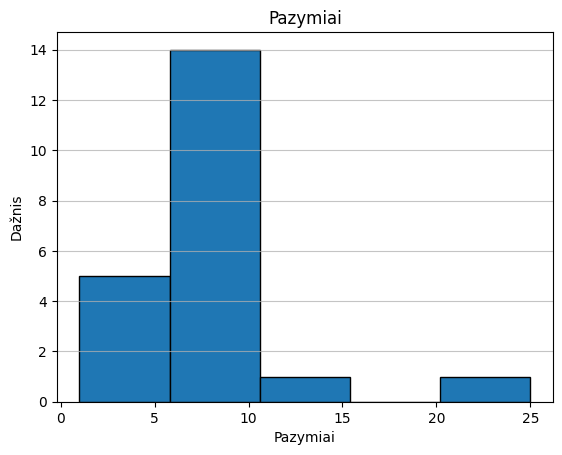

In [68]:
# Histograma
plt.hist(data['pazymiai'], bins=5, edgecolor='black')
plt.title('Pazymiai')
plt.xlabel('Pazymiai')
plt.ylabel('Dažnis')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Užduotis 3 : Pažymių (Boxplot) diagrama

Atvaizduokite šio stulpelio **dėžutės diagramą (boxplot)**:  
- naudokite `plt.boxplot(...)`;  
- pavaizduokite **horizontalų** boxplot (`vert=False`);  
- pridėkite **pavadinimą** (`plt.title`).  

*Atkreipkite dėmesį:* dėžutės diagrama leidžia pamatyti **medianą, kvartilius ir galimus outlierius**.


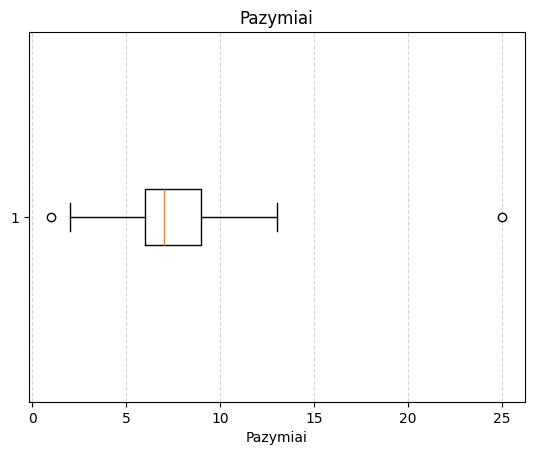

In [80]:
# Boxplot (dėžutės diagrama)
plt.boxplot(data['pazymiai'], vert=False)
plt.title('Pazymiai')
plt.xlabel('Pazymiai')
plt.grid(axis='x', alpha=0.5, linestyle='--')
plt.show()

In [70]:
Wisker_1 = Q1 - (1.5 * IQR)
Wisker_3 = Q3 + (1.5 * IQR)
print(Q1, Q3, 'Wisker_1:', Wisker_1, 'Wisker_3:', Wisker_3)

6.0 9.0 Wisker_1: 1.5 Wisker_3: 13.5
